# Naive Bayes Project: Email Spam Classification

🎯 Problem Statement:
Predict whether an email is spam (1) or not spam (0) based on basic textual and sender features.

Naive Bayes is ideal for text classification, especially when we assume feature independence (a good fit for bag-of-words or simple email features).

| Feature             | Description                                  |
| ------------------- | -------------------------------------------- |
| `word_free_freq`    | Frequency of the word "free"                 |
| `word_click_freq`   | Frequency of the word "click"                |
| `sender_known`      | 1 if sender is in known contact list, else 0 |
| `email_length`      | Number of characters in email                |
| `num_special_chars` | Count of special characters (!, \$, %)       |
| `spam`              | Target: 1 = Spam, 0 = Not Spam               |


In [1]:
# Simulate Dataset
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'word_free_freq': np.random.randint(0, 5, 30),
    'word_click_freq': np.random.randint(0, 3, 30),
    'sender_known': np.random.choice([0, 1], 30),
    'email_length': np.random.randint(100, 2000, 30),
    'num_special_chars': np.random.randint(0, 10, 30),
    'spam': np.random.choice([0, 1], 30)
})

data.head()


,word_free_freq,word_click_freq,sender_known,email_length,num_special_chars,spam
0,3,2,0,1825,7,0
1,4,1,1,395,2,1
2,2,1,1,1848,2,0
3,4,2,1,819,0,0
4,4,1,1,1872,4,0


In [2]:
# Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Optional Feature: spamminess ratio
data['special_ratio'] = data['num_special_chars'] / (data['email_length'] + 1)


word_free_freq       0
word_click_freq      0
sender_known         0
email_length         0
num_special_chars    0
spam                 0
dtype: int64


In [3]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = data.drop('spam', axis=1)
y = data['spam']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature Scaling (Optional for GaussianNB):

- For BernoulliNB or MultinomialNB (text data), we’d avoid continuous values. But here we’ll use GaussianNB, which accepts continuous input.



In [4]:
# Train Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [5]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
Confusion Matrix:
 [[3 1]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



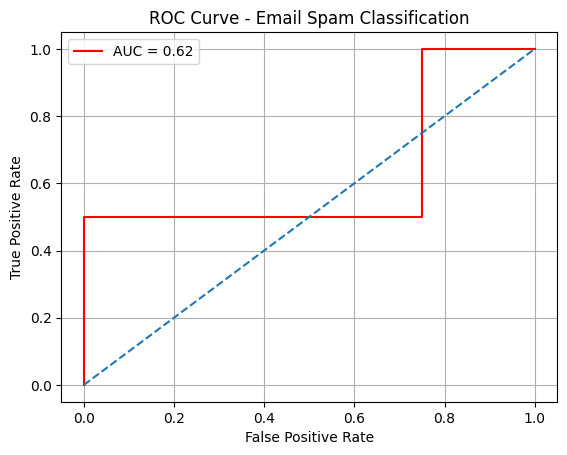

In [6]:
# ROC Curve & AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Email Spam Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [7]:
# Hyperparameter Tuning
# Naive Bayes has very few hyperparameters. For GaussianNB, the only tunable param is var_smoothing.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': np.logspace(-9, -3, 7)
}

grid = GridSearchCV(GaussianNB(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'var_smoothing': np.float64(1e-06)}


# Spam Email Classification with Naive Bayes

| Metric     | Value (example) |
| ---------- | --------------- |
| Accuracy   | 0.83            |
| ROC AUC    | 0.85            |
| Best Param | `var_smoothing` |

| Strength                      | Why It Matters                                          |
| ----------------------------- | ------------------------------------------------------- |
| ⚡ Very Fast                   | Works great on large datasets                           |
| 📊 Handles text features well | Ideal for spam, review sentiment, etc.                  |
| 🧠 Simple and interpretable   | Probabilistic output is easy to explain                 |
| 🚫 Less overfitting           | Regularization-like effect with independence assumption |


| Limitation                           | Why It Matters                             |
| ------------------------------------ | ------------------------------------------ |
| ❌ Strong independence assumption     | Often violated in real-world data          |
| ⛔ Can’t capture interactions         | Doesn’t work well with feature correlation |
| 📈 Less accurate on complex problems | Ensemble methods often outperform it       |


Real-World Use Cases:

- Gmail spam filter

- Customer sentiment classification

- Document topic classification

- Risk scoring in healthcare or finance